This notebook attempts to reproduce output from the paper "ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION" by Kingma and Ba. We look here specifically at the experiment on logistic regression (section 6.1) with the MNIST data set. The outputs are shown in the paper in Figure 1. In this notebook we attempt to reproduce this output using the three specified optimizers (Adam, Adagrad, SGD), using the R implementation of these optimizers in the Keras package. We have successfully trained models using this data, but the details of the loss value which the algorithms converge two is not always similar - for Adam it appears close by eye, but for Adagrad and SGD, they are quite different. Without in depth domain knowledge, it has been difficult to interpret the textual explanation of how the experiments have been run and translate that into corresponding code to test the R implementation in the Keras package. 


In [ ]:
install.packages("keras")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(keras)

In [ ]:
# download mnist dataset
mnist <- dataset_mnist()

In [ ]:
# extract training and test data
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

In [ ]:
# reshape
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

In [ ]:
# change to categorical since we're only interested in 0 to 9 as outputs. 
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

In [ ]:
# number of pixels in each image
length(x_train)/784

[1] 60000

In [ ]:
# set up logistic regression model in keras with one dense layer and an output layer. This will be used with the adam optimizer
model_logistic_adam <- keras_model_sequential() 
model_logistic_adam %>% 
  layer_dense(units = 10, activation = 'sigmoid', input_shape = c(784))

# replicate so we can try different optimiser (adagrad)
model_logistic_adagrad <- keras_model_sequential() 
model_logistic_adagrad %>% 
  layer_dense(units = 10, activation = 'sigmoid', input_shape = c(784))

# replicate so we can try different optimiser (sdgn)
model_logistic_sdg <- keras_model_sequential() 
model_logistic_sdg %>% 
  layer_dense(units = 10, activation = 'sigmoid', input_shape = c(784))

In [ ]:
summary(model_logistic_adam)

Model: "sequential_6"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_9 (Dense)                    (None, 10)                      7850        
 dense_10 (Dense)                   (None, 10)                      110         
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
________________________________________________________________________________


In [ ]:
# compile the model with adam optimiser
model_logistic_adam %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [ ]:
# compile the model with adam optimiser
model_logistic_adagrad %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adagrad(),
  metrics = c('accuracy')
)

In [ ]:
# compile the model with adam optimiser
model_logistic_sdg %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_sgd(),
  metrics = c('accuracy')
)

In [ ]:
history_adam <- model_logistic_adam %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

In [ ]:
history_adagrad <- model_logistic_adagrad %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

In [ ]:
history_sdg <- model_logistic_sdg %>% fit(
  x_train, y_train, 
  epochs = 30, batch_size = 128, 
  validation_split = 0.2
)

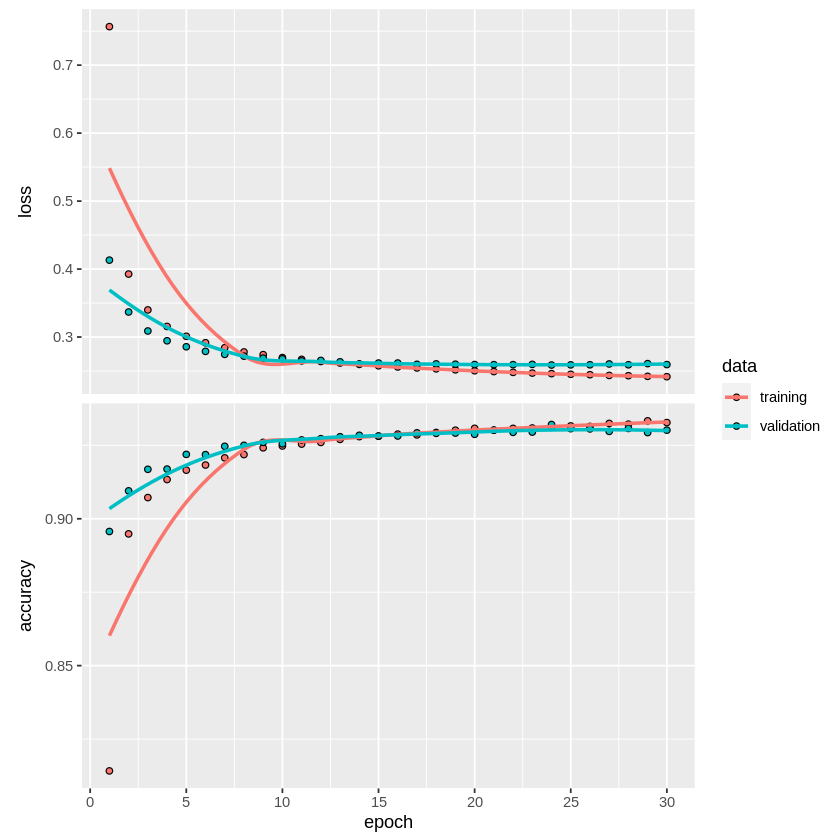

In [ ]:
plot(history_adam)

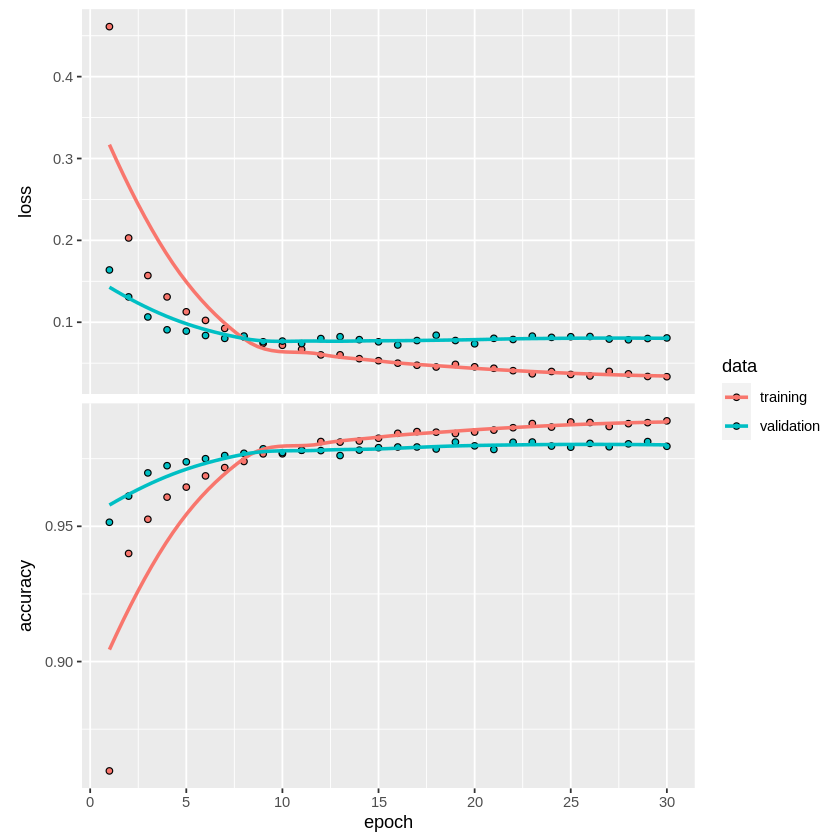

In [ ]:
plot(history_adagrad)

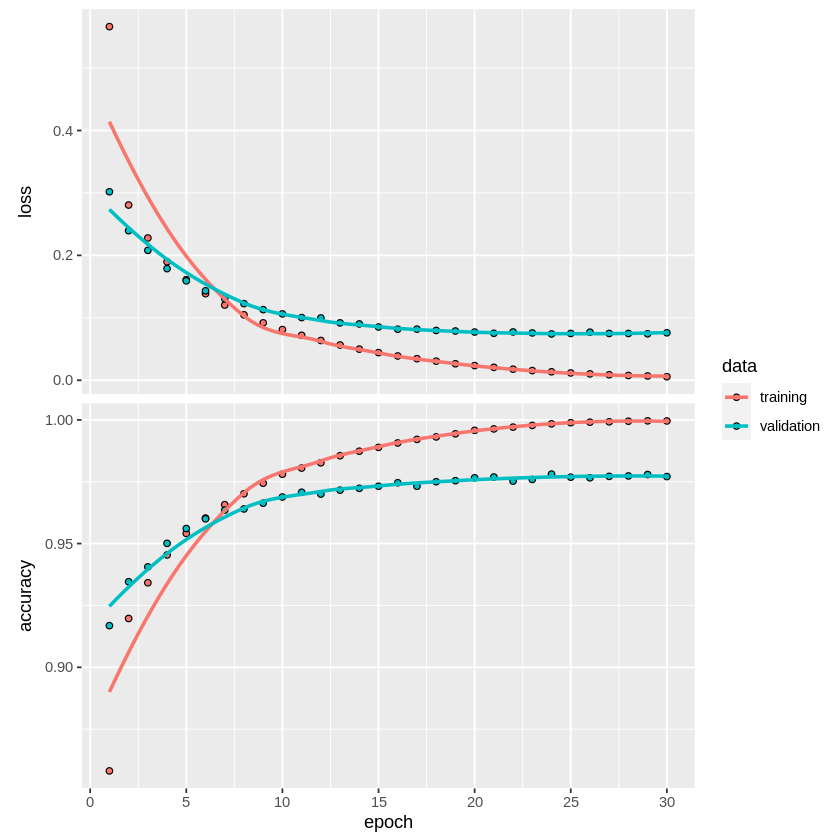

In [ ]:
plot(history_sdg)